## Image import test

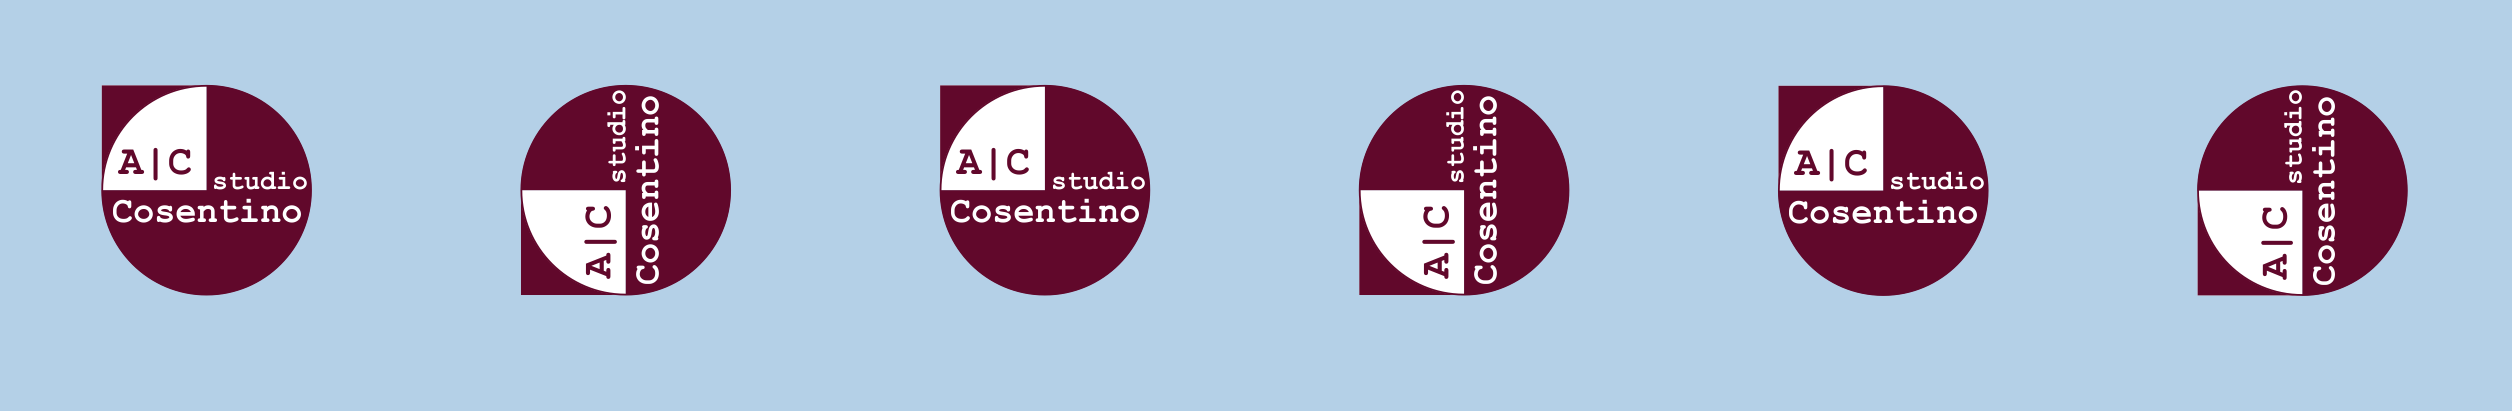

In [1]:
from IPython.display import Image
Image("studioCosentinoDaParati.png")

# Montecarlo Method for $\pi$ approximation

This notebook is devoted to the calculation of $\pi$. A **Montecarlo method** is a computational algorithm relying on repeated random sampling to obtain numerical approximations of complex mathematical problems.
Here is my solution in Python/numpy. Results are visualized in matplotlib.

First of all we need to import the square root function and the random module from numpy.

In [2]:
from numpy import sqrt as s
from numpy import random as r
import matplotlib.pyplot as plt

## Definition of the problem
Montecarlo Method for $\pi$ approximation is based on the hypothesis that the ratio between the area of the square whose side equals $2\times r$ and the area of the inscribed circle is $$\frac{A_{\mathrm{square}}}{A_{\mathrm{circle}}}=\frac{4\times r^2}{\pi \times r^2}=\frac{4}{\pi}$$.

Let us assume that someone throws $n$ darts towards the square and that the dart distribution throughout the square surface is uniform. 

The proportion between the total amount of darts and the amount of darts within the circle will be $4/\pi$. The same criterion holds if the area is restricted only to the positive quarters of both the circle and the square.

## How to implement the simulation

In [3]:
n = 1000      # number of throws n is declared and instantiatd

r.seed(0)     # random seed is called with give int: 0
x = r.rand(n) # rand function is called with n as an argument 
              # to generate x as an numpy.array of numbers in [0,1)

r.seed(1)     # random seed is called with give int: 1
y = r.rand(n) # rand function is called with n as an argument 
              # to generate y as an numpy.array of numbers in [0,1)
z = s(x**2+y**2) # z is the Pythagorean distance 
                 # of point P(x,y) from the origin 

pi = (z < 1).sum()*4/n   # pi is evaluated as the total number 
    # of points within the circle of radius 1 times 4 and divided by n


print('''After n = {}, 
      the value Pi = {} is obtained.'''.format(n,pi))  
                # the result is printed on screen

After n = 1000, 
      the value Pi = 3.16 is obtained.


## How to visualize the simulation results

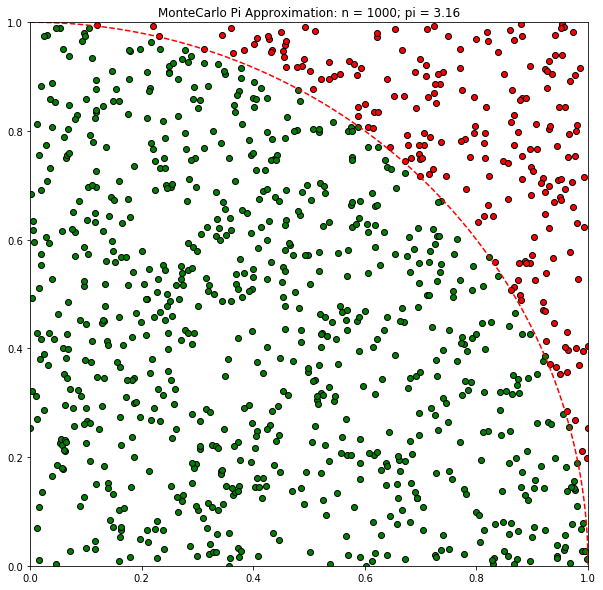

In [4]:
fig, ax = plt.subplots(figsize=(10,10))  
    # subplots object defines figure size, fig and ax

ax.scatter(x[z<=1],y[z<=1],c='g',edgecolors='k')  
    # scatter plot of green darts within circle
ax.scatter(x[z>1],y[z>1],c='r',edgecolors='k')    
    # scatter plot of red darts out of circle
ax.plot(
    [x/1000 for x in range(0,1001)],
    [s(1-(x/1000)**2) for x in range(0,1001)],
    'r--')  # dashed plot of circle sector

ax.set_xlim(0,1)  
    # x axis is limited to the interval [0,1]
ax.set_ylim(0,1)
    # x axis is limited to the interval [0,1]

plt.title("MonteCarlo Pi Approximation: n = {}; pi = {}".format(n,pi))

plt.show()

## How to evaluate the simulation results
We can take the absolute value of the difference between the result and a 20 decimal digit known value of $\pi$. We also round it at the 4th decimal digit.

In [5]:
print(
    'For n = {}, the relative error is: '.format(n),
    abs(round((pi - 3.14159265358979323846)*100/pi, 4)),
    '%'
)

For n = 1000, the relative error is:  0.5825 %


## How to plot multiple results
In the following cell a new function will be clearly needed for code brevity.

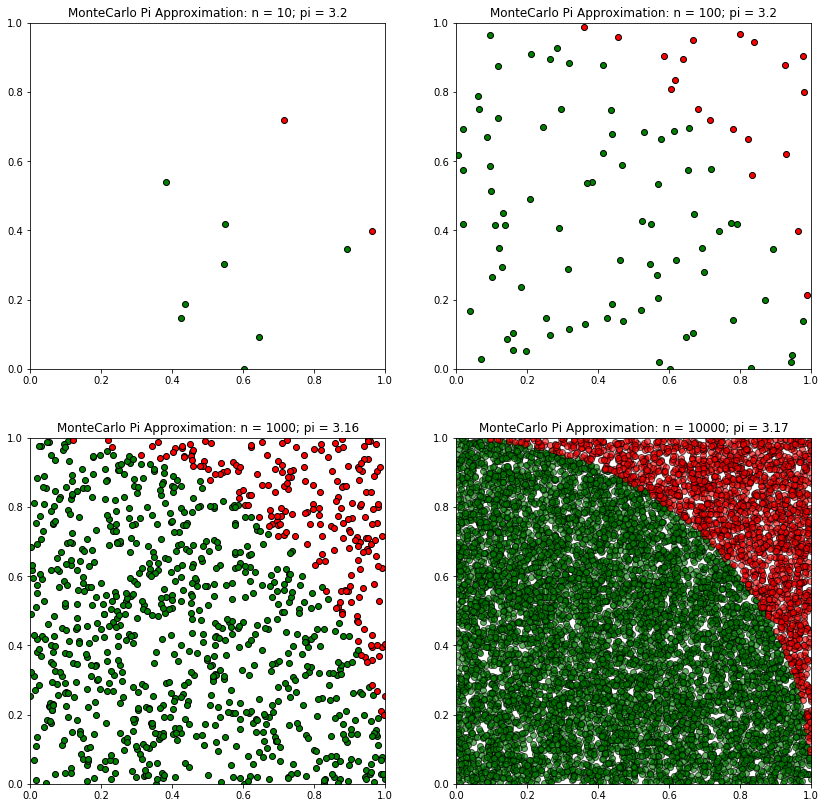

In [6]:
plt.figure(figsize=(14,14))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

n=10
r.seed(0)
x = r.rand(n)
r.seed(1)
y = r.rand(n)
z = s(x**2+y**2)
pi = (z < 1).sum()*4/n

ax1.scatter(x[z<=1],y[z<=1],c='g',edgecolors='k')
ax1.scatter(x[z>1],y[z>1],c='r',edgecolors='k')
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)
ax1.set_title("MonteCarlo Pi Approximation: n = {}; pi = {}".format(n,pi))

n=100
r.seed(0)
x = r.rand(n)
r.seed(1)
y = r.rand(n)
z = s(x**2+y**2)
pi = (z < 1).sum()*4/n

ax2.scatter(x[z<=1],y[z<=1],c='g',edgecolors='k')
ax2.scatter(x[z>1],y[z>1],c='r',edgecolors='k')
ax2.set_xlim(0,1)
ax2.set_ylim(0,1)
ax2.set_title("MonteCarlo Pi Approximation: n = {}; pi = {}".format(n,pi))

n=1000
r.seed(0)
x = r.rand(n)
r.seed(1)
y = r.rand(n)
z = s(x**2+y**2)
pi = (z < 1).sum()*4/n

ax3.scatter(x[z<=1],y[z<=1],c='g',edgecolors='k')
ax3.scatter(x[z>1],y[z>1],c='r',edgecolors='k')
ax3.set_xlim(0,1)
ax3.set_ylim(0,1)
ax3.set_title("MonteCarlo Pi Approximation: n = {}; pi = {}".format(n,pi))

n=10000
r.seed(0)
x = r.rand(n)
r.seed(1)
y = r.rand(n)
z = s(x**2+y**2)
pi = (z < 1).sum()*4/n

ax4.scatter(x[z<=1],y[z<=1],c='g',edgecolors='k',alpha=0.6)   
     # from here I decided to add some transparency, alpha = 0.6
ax4.scatter(x[z>1],y[z>1],c='r',edgecolors='k',alpha=0.6)
ax4.set_xlim(0,1)
ax4.set_ylim(0,1)
ax4.set_title("MonteCarlo Pi Approximation: n = {}; pi = {}".format(n,pi))

plt.show()

## How to change approach for smarter implementation
As you noticed, there was a lot of code that was repeated. Now I introduce a function that is helping us providing the simulated $\pi$ and the $x$, $y$ and $z$ values. It takes as argument the number $n$ and seed values 1 and 2.

In [7]:
def pig(n,seed1=0,seed2=1):
    '''returns pi, x, y and z values 
    for a given number n of simulation steps
    and random seed 1 and 2 (default 0 and 1)'''
    r.seed(seed1)
    x = r.rand(n)
    r.seed(seed2)
    y = r.rand(n)
    z = x**2 + y**2
    return (z < 1).sum()*4/n, x, y, z

In [8]:
n=10                 #let us try to use pig function
print(pig(10)[0])

3.2


Note that pig function includes a docstring. If you type pig and then press shift+double Tab you can read the function help.

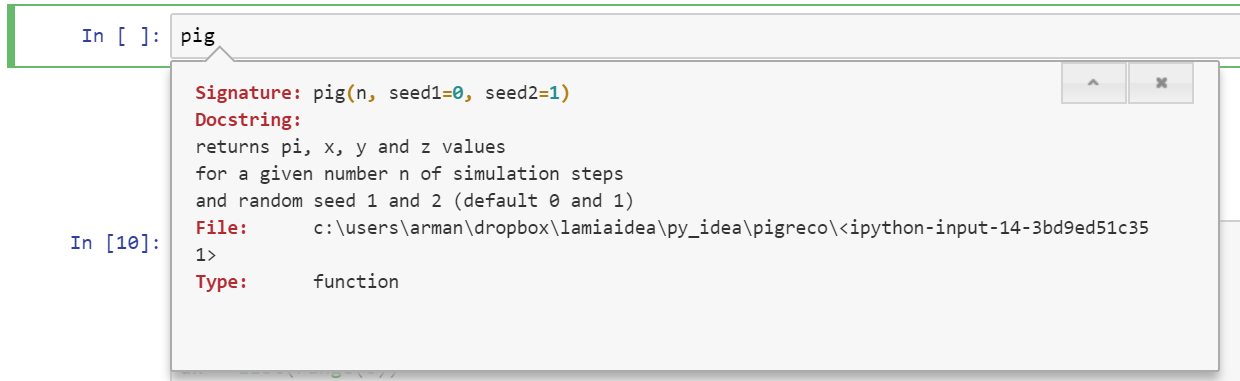

In [9]:
Image("help_docstring.png")

## How to use the new function
Now it is much easier to visualize a plot made of 6 subplots. 

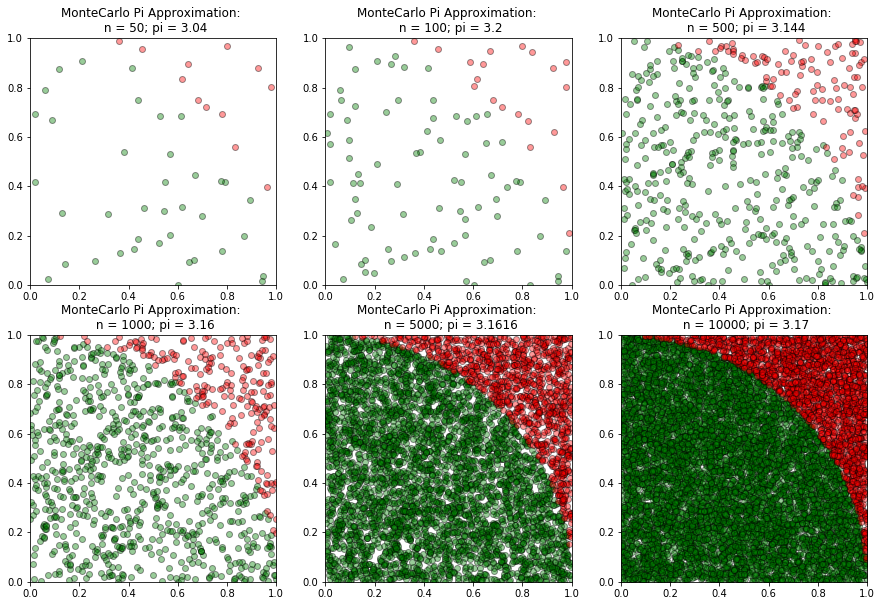

In [10]:
plt.figure(figsize=(15,10))       
    # the overall figure has figsize 15x10 
    # (aspect ratio 3:2 results in single aspect ratio 1:1)
m = [50,100,500,1000,5000,10000]  
    # m is a list of values for number of darts n
ax = list(range(6))               
    # ax is declared as a list of 6 object 
    # (no matter what type they are)
p, x, y, z = (list(range(6)) for i in range(4))   
    # tuple unpacking is easy to do the same 
    # as in case of ax for p, x, y and z

for i in range(6):                # a loop of 6 starts here
    ax[i] = plt.subplot(2,3,i+1)  
            # the i+1th subplot defines the ith ax object
    n = m[i]   # n takes the ith value of m list
    p[i], x[i], y[i], z[i] = pig(n)  
            # the ith identifiers of p,x,y,z 
            # are associated to the returned objects of pig function
    
    ax[i].scatter(
        x[i][z[i]<=1],
        y[i][z[i]<=1],
        c='g',edgecolors='k',
        alpha=0.4) # scatter plot of green darts
    ax[i].scatter(
        x[i][z[i]>1],
        y[i][z[i]>1],
        c='r',edgecolors='k',
        alpha=0.4) # scatter plot of red darts
    
    ax[i].set_xlim(0,1) # x,y axes are limited to the interval [0,1]
    ax[i].set_ylim(0,1)
    ax[i].set_title(
        "MonteCarlo Pi Approximation: \n n = {}; pi = {}".format(n,p[i])
    )  # local title is set

plt.show()

## How to evaluate the method
We can use the %timeit magic cell to evaluate the time complexity of pig function.
I report the results on my local machine (Win i7 16GB RAM).

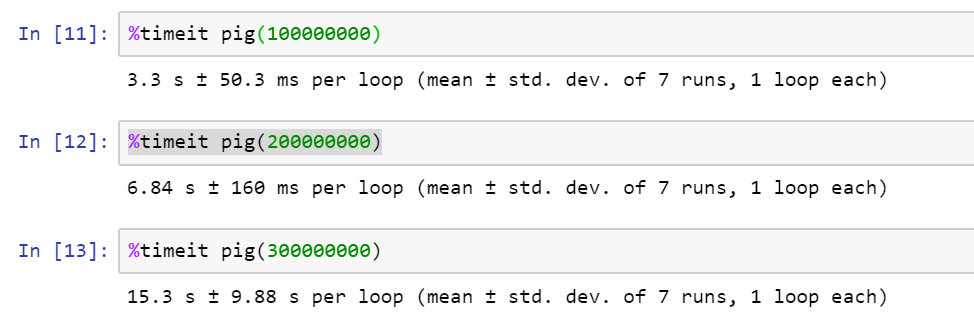

In [11]:
Image("pig1.png")

For n = 300000000, the %timeit test barely succeded.

## How to sum up
We can check several values of n to evaluate the trend.

In [12]:
num_m = [50,100,500,1000,5000,10000,50000,100000,
         500000,1000000,5000000,10000000,50000000,100000000]
num_pi = [pig(i)[0] for i in num_m]

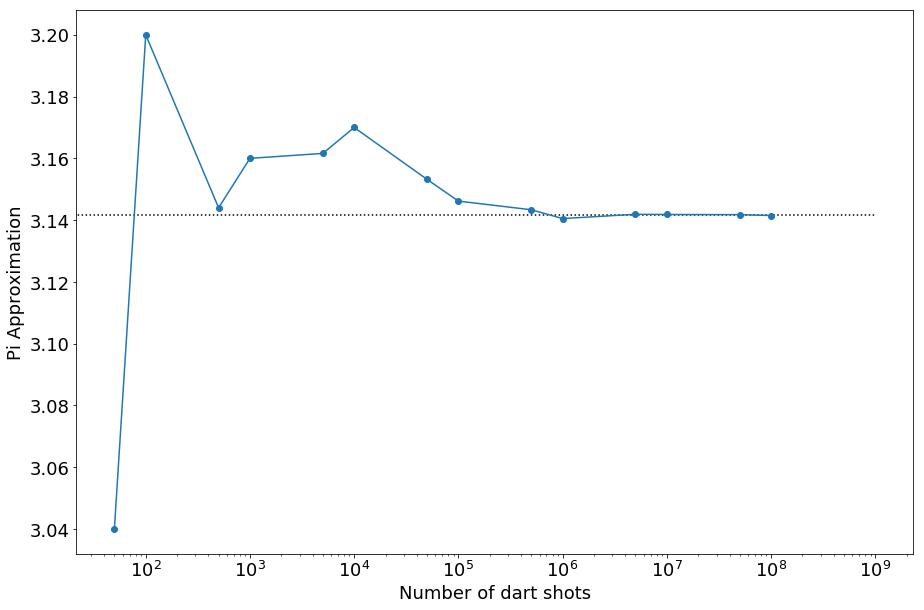

In [13]:
plt.figure(figsize=(15,10))
plt.plot(num_m,num_pi,'o-')
plt.hlines(3.14159265358979323846,xmin=0,xmax=1000000000).set_linestyle(':')
plt.xscale('log')
plt.xlabel('Number of dart shots', fontsize=18)
plt.xticks(fontsize=18)
plt.ylabel('Pi Approximation', fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [14]:
for i in range(len(num_m)):
    print('For n = {}, \n\t the relative error is:\t'.format(num_m[i]),
          abs(round((num_pi[i] - 3.14159265358979323846)*100/num_pi[i], 
                    4)),'%\n')

For n = 50, 
	 the relative error is:	 3.3419 %

For n = 100, 
	 the relative error is:	 1.8252 %

For n = 500, 
	 the relative error is:	 0.0766 %

For n = 1000, 
	 the relative error is:	 0.5825 %

For n = 5000, 
	 the relative error is:	 0.6328 %

For n = 10000, 
	 the relative error is:	 0.8961 %

For n = 50000, 
	 the relative error is:	 0.3681 %

For n = 100000, 
	 the relative error is:	 0.1452 %

For n = 500000, 
	 the relative error is:	 0.0562 %

For n = 1000000, 
	 the relative error is:	 0.0347 %

For n = 5000000, 
	 the relative error is:	 0.0094 %

For n = 10000000, 
	 the relative error is:	 0.0074 %

For n = 50000000, 
	 the relative error is:	 0.0059 %

For n = 100000000, 
	 the relative error is:	 0.0031 %

